In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('data.csv', sep='\t', dtype=object)

In [3]:
df.head()

,Q1A,Q1I,Q1E,Q2A,Q2I,Q2E,Q3A,Q3I,Q3E,Q4A,...,screensize,uniquenetworklocation,hand,religion,orientation,race,voted,married,familysize,major
0,4,28,3890,4,25,2122,2,16,1944,4,...,1,1,1,12,1,10,2,1,2,NaN
1,4,2,8118,1,36,2890,2,35,4777,3,...,2,1,2,7,0,70,2,1,4,NaN
2,3,7,5784,1,33,4373,4,41,3242,1,...,2,1,1,4,3,60,1,1,3,NaN
3,2,23,5081,3,11,6837,2,37,5521,1,...,2,1,2,4,5,70,2,1,5,biology
4,2,36,3215,2,13,7731,3,5,4156,4,...,2,2,3,10,1,10,2,1,4,Psychology


In [4]:
df.shape

(39775, 172)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39775 entries, 0 to 39774
Columns: 172 entries, Q1A to major
dtypes: object(172)
memory usage: 52.2+ MB


In [6]:
df = df.astype({'age': 'int32', 'familysize': 'int32'})

In [7]:
pd.set_option('display.max_rows', 500)
df.isna().sum() # only major has some missing values

Q1A                          0
Q1I                          0
Q1E                          0
Q2A                          0
Q2I                          0
Q2E                          0
Q3A                          0
Q3I                          0
Q3E                          0
Q4A                          0
Q4I                          0
Q4E                          0
Q5A                          0
Q5I                          0
Q5E                          0
Q6A                          0
Q6I                          0
Q6E                          0
Q7A                          0
Q7I                          0
Q7E                          0
Q8A                          0
Q8I                          0
Q8E                          0
Q9A                          0
Q9I                          0
Q9E                          0
Q10A                         0
Q10I                         0
Q10E                         0
Q11A                         0
Q11I                         0
Q11E    

In [8]:
df.head()

,Q1A,Q1I,Q1E,Q2A,Q2I,Q2E,Q3A,Q3I,Q3E,Q4A,...,screensize,uniquenetworklocation,hand,religion,orientation,race,voted,married,familysize,major
0,4,28,3890,4,25,2122,2,16,1944,4,...,1,1,1,12,1,10,2,1,2,NaN
1,4,2,8118,1,36,2890,2,35,4777,3,...,2,1,2,7,0,70,2,1,4,NaN
2,3,7,5784,1,33,4373,4,41,3242,1,...,2,1,1,4,3,60,1,1,3,NaN
3,2,23,5081,3,11,6837,2,37,5521,1,...,2,1,2,4,5,70,2,1,5,biology
4,2,36,3215,2,13,7731,3,5,4156,4,...,2,2,3,10,1,10,2,1,4,Psychology


In [9]:
# goal is to remove all time columns
pd.set_option('display.max_columns', 500)
df = df.drop(['Q1E','Q2E','Q3E','Q4E','Q5E','Q6E','Q7E','Q8E','Q9E','Q10E','Q11E','Q12E','Q13E','Q14E','Q15E','Q16E','Q17E','Q18E','Q19E','Q20E','Q21E','Q22E','Q23E','Q24E','Q25E','Q26E','Q27E','Q28E','Q29E','Q30E','Q31E','Q32E','Q33E','Q34E','Q35E','Q36E','Q37E','Q38E','Q39E','Q40E','Q41E','Q42E'], axis=1)
df = df.drop(['Q1I','Q2I','Q3I','Q4I','Q5I','Q6I','Q7I','Q8I','Q9I','Q10I','Q11I','Q12I','Q13I','Q14I','Q15I','Q16I','Q17I','Q18I','Q19I','Q20I','Q21I','Q22I','Q23I','Q24I','Q25I','Q26I','Q27I','Q28I','Q29I','Q30I','Q31I','Q32I','Q33I','Q34I','Q35I','Q36I','Q37I','Q38I','Q39I','Q40I','Q41I','Q42I'], axis=1)
df = df.drop(['country', 'screensize', 'uniquenetworklocation', 'source', 'major', 'hand', 'engnat', 'religion', ], axis=1)

In [10]:
# also drop the 3 control columns after removing any rows that failed the validity check
df = df.drop(df[df['VCL6'] == 1].index, axis=0)
df = df.drop(df[df['VCL9'] == 1].index, axis=0)
df = df.drop(df[df['VCL12'] == 1].index, axis=0)
df = df.drop(['VCL1','VCL2','VCL3','VCL4','VCL5','VCL6','VCL7','VCL8','VCL9','VCL10', 'VCL11', 'VCL12','VCL13','VCL14','VCL15','VCL16'], axis=1)

In [11]:
df = df.drop(df[df['age'] > 100]['age'].index, axis=0)

In [12]:
# age could be binned
df['age'] = pd.cut(df['age'], 4)

In [13]:
# lets drop even more columns before we do some unsupervised
df = df.drop(['introelapse', 'testelapse', 'surveyelapse'], axis=1)

In [14]:
# show some statistics about the questions (e.g. what was the average answer)
for_descriptive = df.drop(['age','orientation','race', 'voted', 'married', 'education', 'urban'],axis=1).astype('int32')
for_descriptive.describe().transpose() # some descriptive statistics

,count,mean,std,min,25%,50%,75%,max
Q1A,39768.0,2.619392,1.032126,1.0,2.0,3.0,4.0,4.0
Q2A,39768.0,2.172350,1.111560,1.0,1.0,2.0,3.0,4.0
Q3A,39768.0,2.226036,1.038490,1.0,1.0,2.0,3.0,4.0
Q4A,39768.0,1.950111,1.042162,1.0,1.0,2.0,3.0,4.0
Q5A,39768.0,2.521424,1.069912,1.0,2.0,2.0,3.0,4.0
Q6A,39768.0,2.540258,1.049622,1.0,2.0,2.0,3.0,4.0
Q7A,39768.0,1.924839,1.033480,1.0,1.0,2.0,3.0,4.0
Q8A,39768.0,2.480437,1.052436,1.0,2.0,2.0,3.0,4.0
Q9A,39768.0,2.669584,1.067872,1.0,2.0,3.0,4.0,4.0
Q10A,39768.0,2.447319,1.139365,1.0,1.0,2.0,4.0,4.0


<AxesSubplot:>

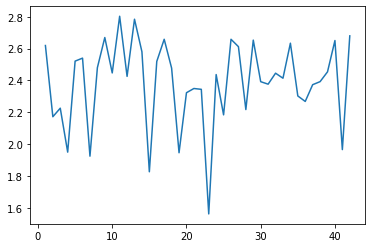

In [15]:
sns.lineplot(x=range(1,43), y=for_descriptive.transpose().mean(axis=1)[:42])

In [16]:
for_descriptive.columns[:-13]

Index(['Q1A', 'Q2A', 'Q3A', 'Q4A', 'Q5A', 'Q6A', 'Q7A', 'Q8A', 'Q9A', 'Q10A',
       'Q11A', 'Q12A', 'Q13A', 'Q14A', 'Q15A', 'Q16A', 'Q17A', 'Q18A', 'Q19A',
       'Q20A', 'Q21A', 'Q22A', 'Q23A', 'Q24A', 'Q25A', 'Q26A', 'Q27A', 'Q28A',
       'Q29A', 'Q30A', 'Q31A', 'Q32A', 'Q33A', 'Q34A', 'Q35A', 'Q36A', 'Q37A',
       'Q38A', 'Q39A', 'Q40A', 'Q41A'],
      dtype='object')

In [17]:
gender = for_descriptive.groupby('gender').mean().transpose()[:42].melt()

In [18]:
gender.groupby('gender').describe()

value                                                              \
       count      mean       std       min       25%       50%       75%   
gender                                                                     
0       42.0  2.446340  0.300951  1.641791  2.388060  2.477612  2.649254   
1       42.0  2.245270  0.278472  1.430473  2.092513  2.331589  2.423959   
2       42.0  2.421910  0.274790  1.595633  2.333034  2.451928  2.649213   
3       42.0  2.739821  0.299858  1.817029  2.591033  2.790761  2.911232   

                  
             max  
gender            
0       2.940299  
1       2.693104  
2       2.893877  
3       3.237319

In [19]:
for_descriptive = df.drop(['age','orientation','race', 'voted', 'married', 'gender', 'urban'],axis=1).astype('int32')

In [20]:
education = for_descriptive.groupby('education').mean().transpose()[:42].melt()

<AxesSubplot:>

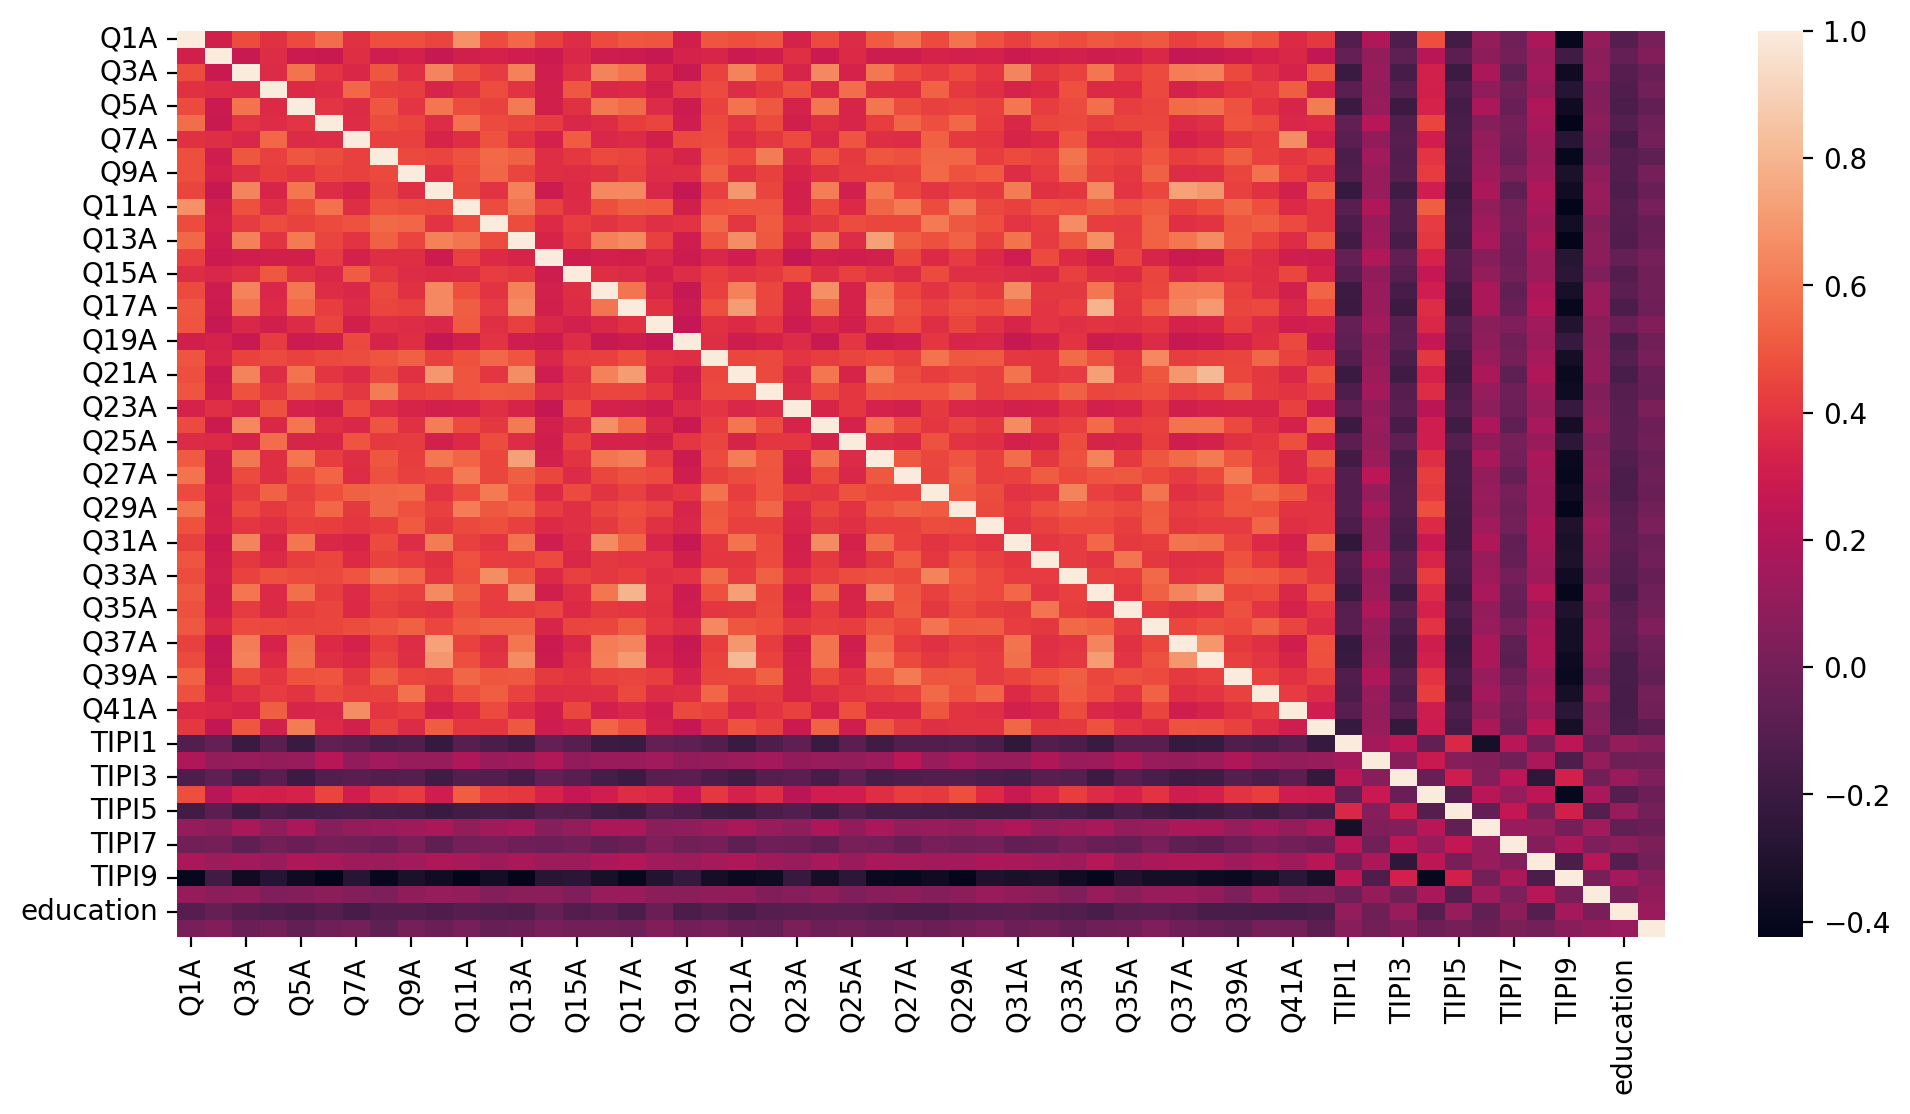

In [21]:
# lets do some unsupervised
plt.figure(figsize=(12,6), dpi=200)
sns.heatmap(for_descriptive.corr())

In [22]:
for_descriptive.corr()

,Q1A,Q2A,Q3A,Q4A,Q5A,Q6A,Q7A,Q8A,Q9A,Q10A,Q11A,Q12A,Q13A,Q14A,Q15A,Q16A,Q17A,Q18A,Q19A,Q20A,Q21A,Q22A,Q23A,Q24A,Q25A,Q26A,Q27A,Q28A,Q29A,Q30A,Q31A,Q32A,Q33A,Q34A,Q35A,Q36A,Q37A,Q38A,Q39A,Q40A,Q41A,Q42A,TIPI1,TIPI2,TIPI3,TIPI4,TIPI5,TIPI6,TIPI7,TIPI8,TIPI9,TIPI10,education,familysize
Q1A,1.000000,0.313998,0.471075,0.383094,0.463093,0.561180,0.384768,0.476607,0.472135,0.447915,0.675155,0.467659,0.544867,0.437924,0.370218,0.463811,0.494913,0.488689,0.315196,0.490272,0.473881,0.489331,0.330944,0.460973,0.362784,0.508458,0.577353,0.463193,0.581538,0.485831,0.434864,0.489331,0.470348,0.500961,0.482182,0.500139,0.432894,0.462503,0.530354,0.477276,0.357234,0.406959,-0.113166,0.190580,-0.129316,0.473393,-0.171155,0.109665,-0.011683,0.174675,-0.399223,0.105191,-0.105242,0.008774
Q2A,0.313998,1.000000,0.280510,0.368396,0.283593,0.280581,0.372919,0.304336,0.326028,0.271526,0.312270,0.325343,0.303025,0.287154,0.346357,0.294850,0.292188,0.274884,0.332312,0.339854,0.286345,0.306860,0.381352,0.287028,0.355542,0.299181,0.298174,0.330808,0.316579,0.323577,0.282684,0.305115,0.319968,0.296390,0.303542,0.349774,0.264638,0.274964,0.292090,0.325112,0.354660,0.257920,-0.054314,0.099301,-0.074871,0.221171,-0.081424,0.080181,0.002669,0.129497,-0.179588,0.077793,-0.053945,0.040665
Q3A,0.471075,0.280510,1.000000,0.360917,0.581736,0.397505,0.352730,0.494451,0.379703,0.634051,0.477524,0.417065,0.622763,0.304517,0.380691,0.627892,0.581711,0.352093,0.280893,0.440607,0.629860,0.483483,0.342201,0.646007,0.331111,0.595599,0.460775,0.417767,0.466026,0.401976,0.636979,0.406311,0.439796,0.591369,0.420989,0.465711,0.614579,0.623555,0.457682,0.377206,0.328958,0.497151,-0.204690,0.118109,-0.157203,0.316716,-0.198169,0.178254,-0.075992,0.159811,-0.366433,0.092533,-0.102254,-0.037569
Q4A,0.383094,0.368396,0.360917,1.000000,0.358460,0.367352,0.547589,0.432773,0.424287,0.339108,0.380236,0.466654,0.391126,0.315297,0.501324,0.347163,0.359352,0.312237,0.420866,0.464800,0.368327,0.415589,0.478964,0.350021,0.564484,0.375131,0.371949,0.529123,0.414793,0.377155,0.338104,0.356737,0.479767,0.358414,0.354938,0.459591,0.327707,0.356195,0.402851,0.417557,0.517218,0.316784,-0.086762,0.099130,-0.091770,0.315582,-0.129232,0.090368,-0.008278,0.126360,-0.282295,0.037157,-0.127981,-0.009730
Q5A,0.463093,0.283593,0.581736,0.358460,1.000000,0.393816,0.363110,0.496641,0.395808,0.593117,0.467974,0.440177,0.604324,0.311823,0.382880,0.596382,0.560147,0.361788,0.289956,0.439645,0.582832,0.503956,0.327701,0.592021,0.339408,0.591445,0.471427,0.430397,0.450721,0.427497,0.588681,0.422401,0.463438,0.568572,0.425870,0.448573,0.558603,0.570394,0.484806,0.392994,0.340792,0.609517,-0.204416,0.119980,-0.196578,0.328773,-0.167306,0.177274,-0.036907,0.198690,-0.366068,0.054494,-0.140015,-0.067589
Q6A,0.561180,0.280581,0.397505,0.367352,0.393816,1.000000,0.370507,0.467022,0.446725,0.367626,0.571992,0.463365,0.445219,0.420237,0.344608,0.369854,0.421659,0.448043,0.308619,0.455058,0.397755,0.461280,0.311737,0.376604,0.343439,0.422912,0.533788,0.475277,0.545554,0.422226,0.351245,0.450959,0.458802,0.423378,0.448974,0.452485,0.356768,0.381565,0.492809,0.463179,0.347276,0.357071,-0.062992,0.217264,-0.121752,0.449340,-0.150821,0.054908,0.000744,0.166279,-0.415323,0.072134,-0.108017,-0.019542
Q7A,0.384768,0.372919,0.352730,0.547589,0.363110,0.370507,1.000000,0.429747,0.431814,0.337228,0.376639,0.482944,0.388599,0.325204,0.515310,0.346533,0.360750,0.315631,0.460199,0.470858,0.363374,0.410341,0.465572,0.343822,0.493021,0.375314,0.371215,0.526171,0.413806,0.400423,0.337113,0.360331,0.488412,0.365403,0.358855,0.467355,0.326903,0.351413,0.406605,0.433654,0.662228,0.318185,-0.087657,0.095624,-0.095185,0.308923,-0.136868,0.100170,-0.009346,0.137423,-0.272066,0.044449,-0.155317,-0.003123
Q8A,0.476607,0.304336,0.494451,0.432773,0.496641,0.467022,0.429747,1.000000,0.459961,0.445267,0.485202,0.554203,0.522743,0.375747,0.410441,0.457761,0.444709,0.379842,0.337822,0.491336,0.455941,0.609072,0.368699,0.488966,0.412229,0.495352,0.4

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 39768 entries, 0 to 39774
Data columns (total 61 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   Q1A          39768 non-null  object  
 1   Q2A          39768 non-null  object  
 2   Q3A          39768 non-null  object  
 3   Q4A          39768 non-null  object  
 4   Q5A          39768 non-null  object  
 5   Q6A          39768 non-null  object  
 6   Q7A          39768 non-null  object  
 7   Q8A          39768 non-null  object  
 8   Q9A          39768 non-null  object  
 9   Q10A         39768 non-null  object  
 10  Q11A         39768 non-null  object  
 11  Q12A         39768 non-null  object  
 12  Q13A         39768 non-null  object  
 13  Q14A         39768 non-null  object  
 14  Q15A         39768 non-null  object  
 15  Q16A         39768 non-null  object  
 16  Q17A         39768 non-null  object  
 17  Q18A         39768 non-null  object  
 18  Q19A         39768 non-nul

In [24]:
# lets split all the questions and the tipis
columns = ['Q1A', 'Q2A', 'Q3A', 'Q4A', 'Q5A', 'Q6A', 'Q7A', 'Q8A', 'Q9A', 'Q10A',
       'Q11A', 'Q12A', 'Q13A', 'Q14A', 'Q15A', 'Q16A', 'Q17A', 'Q18A', 'Q19A',
       'Q20A', 'Q21A', 'Q22A', 'Q23A', 'Q24A', 'Q25A', 'Q26A', 'Q27A', 'Q28A',
       'Q29A', 'Q30A', 'Q31A', 'Q32A', 'Q33A', 'Q34A', 'Q35A', 'Q36A', 'Q37A',
       'Q38A', 'Q39A', 'Q40A', 'Q41A', 'Q42A']

In [25]:
questions = for_descriptive[columns]

<AxesSubplot:>

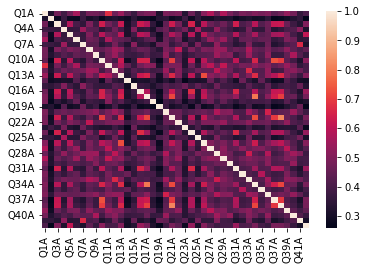

In [26]:
sns.heatmap(questions.corr()) # here we can see that all the questions are highly correlated.

In [27]:
#sns.clustermap(questions)

In [28]:
columns = ['TIPI1', 'TIPI2', 'TIPI3', 'TIPI4', 'TIPI5', 'TIPI6', 'TIPI7', 'TIPI8', 'TIPI9', 'TIPI10']

In [29]:
tipis = for_descriptive[columns]

In [30]:
tipis.head()

,TIPI1,TIPI2,TIPI3,TIPI4,TIPI5,TIPI6,TIPI7,TIPI8,TIPI9,TIPI10
0,1,5,7,7,7,7,7,5,1,1
1,6,5,4,7,5,4,7,7,1,5
2,2,5,2,2,5,6,5,5,3,2
3,1,1,7,4,6,4,6,1,6,1
4,2,5,3,6,5,5,5,6,3,3


TIPI1	Extraverted, enthusiastic.
TIPI2	Critical, quarrelsome.
TIPI3	Dependable, self-disciplined.
TIPI4	Anxious, easily upset.
TIPI5	Open to new experiences, complex.
TIPI6	Reserved, quiet.
TIPI7	Sympathetic, warm.
TIPI8	Disorganized, careless.
TIPI9	Calm, emotionally stable.
TIPI10	Conventional, uncreative.

<AxesSubplot:>

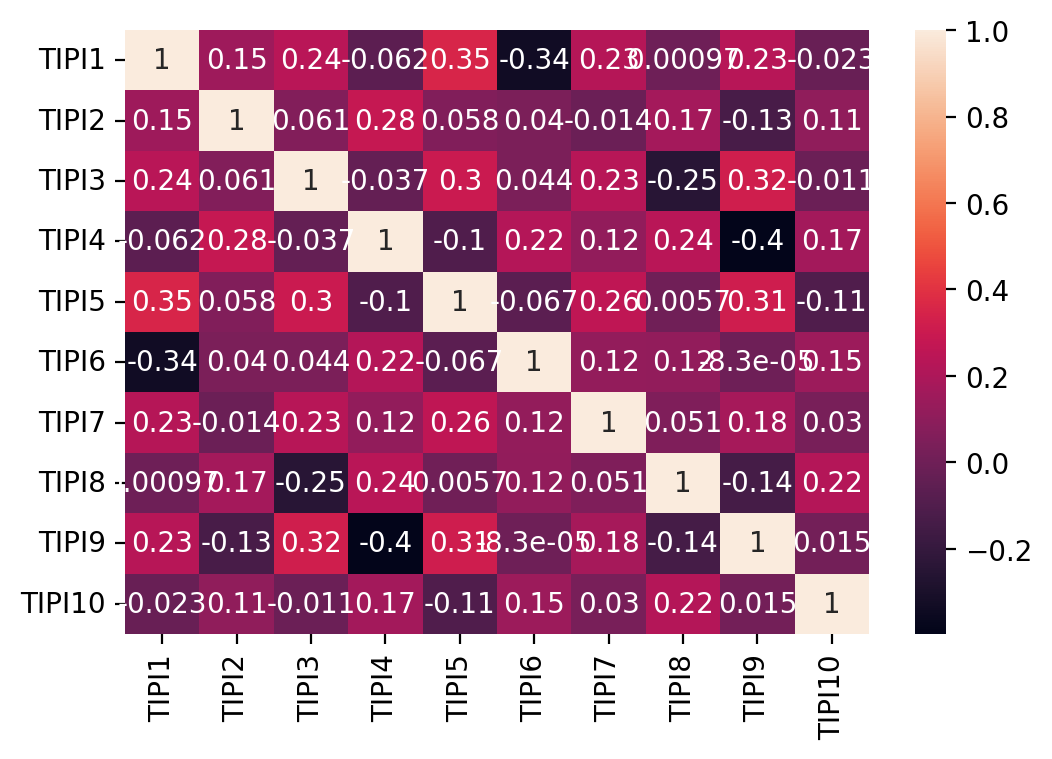

In [31]:
plt.figure(figsize=(6,4), dpi=200)
sns.heatmap(tipis.corr(), annot=True) # here we can see that some of the tipis are highly correlated.

In [32]:
#sns.clustermap(tipis, method='average') # here we can see that some of the tipis are highly correlated.

In [33]:
from sklearn.decomposition import PCA
pca = PCA(n_components=5)

In [34]:
questions.columns

Index(['Q1A', 'Q2A', 'Q3A', 'Q4A', 'Q5A', 'Q6A', 'Q7A', 'Q8A', 'Q9A', 'Q10A',
       'Q11A', 'Q12A', 'Q13A', 'Q14A', 'Q15A', 'Q16A', 'Q17A', 'Q18A', 'Q19A',
       'Q20A', 'Q21A', 'Q22A', 'Q23A', 'Q24A', 'Q25A', 'Q26A', 'Q27A', 'Q28A',
       'Q29A', 'Q30A', 'Q31A', 'Q32A', 'Q33A', 'Q34A', 'Q35A', 'Q36A', 'Q37A',
       'Q38A', 'Q39A', 'Q40A', 'Q41A', 'Q42A'],
      dtype='object')

In [35]:
principal_components = pca.fit_transform(questions)

In [36]:
df_comp = pd.DataFrame(pca.components_,index=['PC1','PC2','PC3','PC4','PC5'],columns=questions.columns)

In [37]:
df_comp.transpose().sort_values(by=['PC1', 'PC2'], ascending=False)

,PC1,PC2,PC3,PC4,PC5
Q21A,0.189372,-0.250521,0.112349,-0.087882,-0.168248
Q38A,0.188942,-0.266864,0.119871,-0.091565,-0.170262
Q34A,0.187334,-0.206212,0.047513,-0.212985,-0.201248
Q17A,0.186250,-0.203875,0.044730,-0.218529,-0.220500
Q13A,0.179556,-0.140745,-0.013334,-0.048555,0.038349
Q10A,0.178157,-0.254021,0.092999,0.004811,-0.019215
Q37A,0.172717,-0.248022,0.108072,-0.032802,-0.060493
Q16A,0.171784,-0.203125,0.046522,0.152485,0.108086
Q26A,0.170599,-0.131279,-0.014375,-0.006845,0.065827
Q36A,0.170559,0.097337,0.060344,-0.285875,0.002196


In [38]:
pca.explained_variance_ # total explained variance of 2 pcs

array([21.85312231,  3.39201645,  1.7889969 ,  1.26533767,  1.13070256])

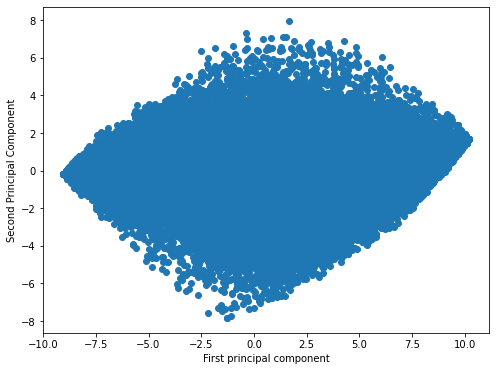

In [39]:
# it can be seen that 2 pcs already explain some variance of the data. More pcs contribute only little more.
plt.figure(figsize=(8,6))
plt.scatter(principal_components[:,0],principal_components[:,1])
plt.xlabel('First principal component')
plt.ylabel('Second Principal Component');

relevant for evaluating the depression category is the sum of the answers of following questions: 3, 5, 10, 13, 16, 17, 21, 24, 26, 31, 34, 37, 38, 42

In [40]:
questions.sum(axis=1).describe()

count    39768.000000
mean       100.267854
std         30.027861
min         42.000000
25%         77.000000
50%        100.000000
75%        123.000000
max        168.000000
dtype: float64

In [41]:
columns = ['Q3A', 'Q5A', 'Q10A', 'Q13A', 'Q16A', 'Q17A','Q21A', 'Q24A', 'Q26A', 'Q31A', 'Q34A', 'Q37A',
       'Q38A', 'Q42A']

In [42]:
df_dep = df

In [43]:
df_dep['dep scores'] = questions[columns].sum(axis=1)

In [44]:
#df_dep.head()

In [45]:
df['gender'].value_counts() # drop 0 for gender, education, urban, married and orientation

2    30361
1     8788
3      552
0       67
Name: gender, dtype: int64

In [46]:
df['voted'].value_counts()

2    28393
1    11048
0      327
Name: voted, dtype: int64

now after calculating the depression scores, we can drop the question scores since all those columns are highly correlated.

In [47]:
columns = ['education', 'urban', 'gender',
       'age', 'orientation', 'race', 'voted', 'married', 'familysize',
       'dep scores']

In [48]:
df_dep = df_dep[columns]

columns = ['education', 'urban', 'gender',
       'age', 'orientation', 'race', 'voted', 'married']

In [49]:
#df_dep.info()

In [50]:
indexes = [] # indexes to drop because they contain 0 values and we want to consider only "real" answer to train our models
indexes.append(df_dep[df_dep['gender'] == '0'].index)
indexes.append(df_dep[df_dep['education'] == '0'].index)
indexes.append(df_dep[df_dep['urban'] == '0'].index)
indexes.append(df_dep[df_dep['orientation'] == '0'].index)
indexes.append(df_dep[df_dep['married'] == '0'].index)
indexes.append(df_dep[df_dep['voted'] == '0'].index)
flat_list = []
for sublist in indexes:
    for item in sublist:
        flat_list.append(item)

In [51]:
flat_list = list(dict.fromkeys(flat_list))

In [52]:
df_dep = df_dep.drop(flat_list, axis=0)

In [53]:
df_dep.shape

(35594, 10)

In [54]:
df_dep = pd.get_dummies(data=df_dep, drop_first=True)

In [55]:
df_dep.head()

,familysize,dep scores,education_2,education_3,education_4,urban_2,urban_3,gender_2,gender_3,"age_(34.5, 56.0]","age_(56.0, 77.5]","age_(77.5, 99.0]",orientation_2,orientation_3,orientation_4,orientation_5,race_20,race_30,race_40,race_50,race_60,race_70,voted_2,married_2,married_3
0,2,41,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
2,3,53,1,0,0,0,1,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0
3,5,30,0,0,0,0,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1,0,0
4,4,46,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
5,4,27,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0


In [56]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV, train_test_split

We want to try to predict different demographics, but first we check again for correlations

In [57]:
df_dep.corr()['dep scores'].sort_values()[:-1]

married_2          -0.143383
education_4        -0.097248
education_3        -0.084825
age_(34.5, 56.0]   -0.082514
familysize         -0.044956
age_(56.0, 77.5]   -0.035697
urban_2            -0.019231
married_3          -0.011486
age_(77.5, 99.0]   -0.003660
race_40             0.001491
race_70             0.001873
race_30             0.004637
gender_2            0.014070
race_20             0.018393
race_50             0.019856
orientation_4       0.023972
urban_3             0.027765
orientation_5       0.030696
orientation_3       0.031429
race_60             0.062640
gender_3            0.063458
education_2         0.085501
voted_2             0.099991
orientation_2       0.106279
Name: dep scores, dtype: float64

<AxesSubplot:>

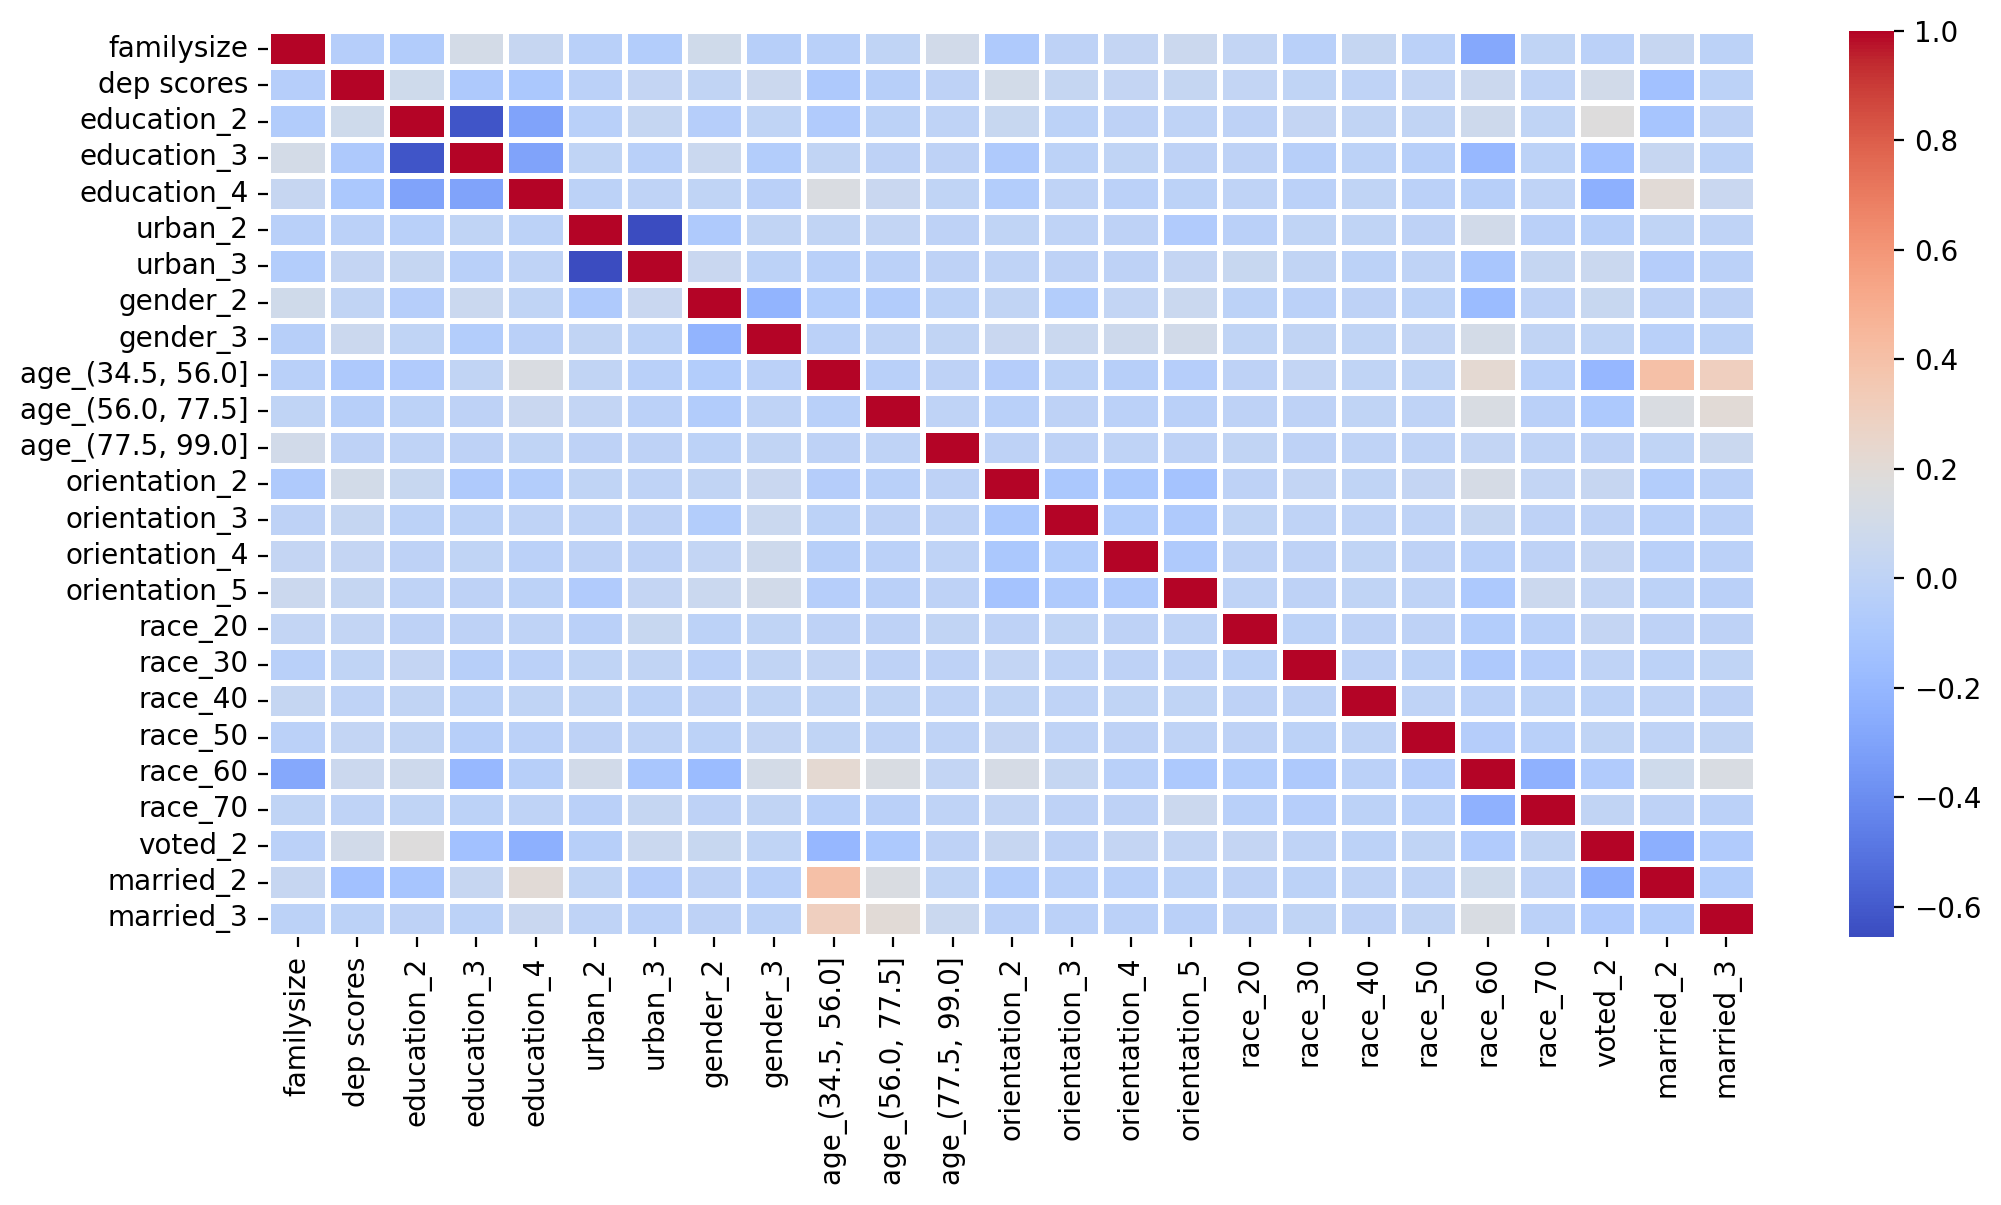

In [58]:
plt.figure(figsize=(12,6), dpi=200)
sns.heatmap(df_dep.corr(), cmap='coolwarm', lw=2)

We want to try to predict the test score based on the other attributes

In [59]:
X = df_dep.drop('dep scores', axis=1)
y = df_dep['dep scores']

In [60]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [61]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

In [62]:
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [63]:
base = RandomForestRegressor()
param_grid = {'n_estimators' : [100, 150, 200], 'max_features' : ["auto", "sqrt", "log2"], 'max_depth' : [5, 10, 15, 'None']}

In [64]:
#help(RandomForestRegressor)

In [65]:
grid = GridSearchCV(estimator=base, param_grid=param_grid)

In [66]:
grid.fit(X_train, y_train)

C:\Users\wanke\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
45 fits failed out of a total of 180.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
45 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\wanke\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 681, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\wanke\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 442, in fit
    trees = Parallel(
  File "C:\Users\wanke\anaconda3\lib\site-packages\joblib\parallel.py", line 1043, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\Users\wanke\anaconda3\lib\site-packages\j

GridSearchCV(estimator=RandomForestRegressor(),
             param_grid={'max_depth': [5, 10, 15, 'None'],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'n_estimators': [100, 150, 200]})

In [67]:
grid.best_params_

{'max_depth': 10, 'max_features': 'sqrt', 'n_estimators': 200}

In [68]:
y_pred = grid.predict(X_test)

In [69]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
print(mean_absolute_error(y_test, y_pred))
print(mean_squared_error(y_test, y_pred))

10.331159705344346
144.80058822148644


In [70]:
df_dep['dep scores'].describe()

count    35594.000000
mean        35.098640
std         12.359884
min         14.000000
25%         25.000000
50%         35.000000
75%         46.000000
max         56.000000
Name: dep scores, dtype: float64

In [71]:
from sklearn.linear_model import Lasso
model = Lasso()

In [72]:
model.fit(X_train, y_train)

Lasso()

In [73]:
y_pred = model.predict(X_test)

In [74]:
print(mean_absolute_error(y_test, y_pred))
print(mean_squared_error(y_test, y_pred))

10.592654286261698
150.05685200503348


In [75]:
pd.DataFrame(model.coef_, X.columns)

,0
familysize,-0.000000
education_2,0.000000
education_3,-0.007068
education_4,-0.000000
urban_2,-0.000000
urban_3,0.000000
gender_2,0.000000
gender_3,0.000000
"age_(34.5, 56.0]",-0.000000
"age_(56.0, 77.5]",-0.000000


Seems like our models do more or less okay - nothing special (deviation equal to absolute error) but I find it still interesting that it seems like that some combination of characteristics of a person can predict how likely and how severe they are depressed. Bonus: I want to predict my score based on my demographics.

In [88]:
chris = [[2,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,]]
print(f"Seems like I am an average guy in terms of depression level: {model.predict(chris)}")

Seems like I am an average guy in terms of depression level: [35.05119348]


In [83]:
X.head(1)

,familysize,education_2,education_3,education_4,urban_2,urban_3,gender_2,gender_3,"age_(34.5, 56.0]","age_(56.0, 77.5]","age_(77.5, 99.0]",orientation_2,orientation_3,orientation_4,orientation_5,race_20,race_30,race_40,race_50,race_60,race_70,voted_2,married_2,married_3
0,2,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0


Another interesting question is how long do people (or group of individuals) take to answer specific questions. For that we need the mean time it took for the participants to answer each question.

In [76]:
time_df = pd.read_csv('data.csv', sep='\t')

In [77]:
# make loop to only get the Q*I columns; we know there is a total of 42 questions; units are in milliseconds
columns_I = []
for i in range(1,43):
    columns_I.append('Q'+str(i)+'E')

In [78]:
time_df = time_df[columns_I]
time_df.head()

,Q1E,Q2E,Q3E,Q4E,Q5E,Q6E,Q7E,Q8E,Q9E,Q10E,Q11E,Q12E,Q13E,Q14E,Q15E,Q16E,Q17E,Q18E,Q19E,Q20E,Q21E,Q22E,Q23E,Q24E,Q25E,Q26E,Q27E,Q28E,Q29E,Q30E,Q31E,Q32E,Q33E,Q34E,Q35E,Q36E,Q37E,Q38E,Q39E,Q40E,Q41E,Q42E
0,3890,2122,1944,2044,2153,2416,2818,2259,5541,4441,2451,3325,1416,5021,2342,2480,2476,1627,9050,7001,4719,2984,1313,2444,9880,4695,1677,6723,5953,8062,5560,3032,3316,3563,5594,1477,3885,5265,1892,4228,1574,2969
1,8118,2890,4777,3090,5078,2790,3408,8342,916,1537,3926,3691,2004,8888,4109,4058,3692,3373,6015,3023,2670,5727,3641,2670,7649,2537,2907,1685,4726,6063,3307,4995,2505,2540,4359,3925,4609,3755,2323,5713,1334,5562
2,5784,4373,3242,6470,3927,3704,4550,3021,5864,3722,3424,3236,2489,7290,6587,3627,2905,2998,10233,4258,2888,59592,11732,8834,7358,4928,3036,4127,3934,10782,8273,3501,3824,2141,17461,1557,4446,1883,5790,4432,2203,5768
3,5081,6837,5521,4556,3269,3231,7138,3079,9650,4179,5928,2838,2560,5139,3597,3336,4506,2695,8128,3125,4061,4272,4029,5630,30631,9870,2411,9478,7618,12639,5378,8923,2977,5620,16760,6427,3760,4112,2769,4432,3643,3698
4,3215,7731,4156,2802,5628,6522,2374,3054,2975,3524,3033,2132,1314,3181,2249,2623,3093,7098,1938,3502,4776,4463,2436,4047,3787,2102,12351,2410,5056,3343,3012,3520,1868,2536,3725,2130,3952,10694,3231,3604,1950,6265


In [79]:
time_spent = time_df.mean(axis=0)

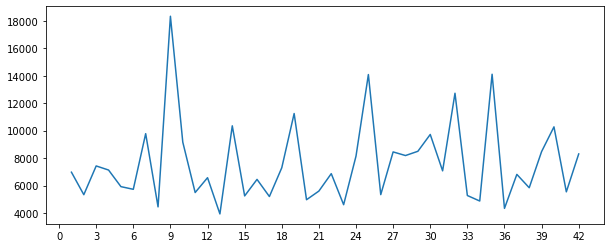

In [80]:
plt.figure(figsize=(10,4))
sns.lineplot(x=range(1,43), y=time_spent)
plt.xticks(np.arange(0, 43, step=3));

In [81]:
# show some descriptive statistics
time_df.describe().transpose().sort_values(by='mean')

,count,mean,std,min,25%,50%,75%,max
Q13E,39775.0,3931.871779,2.827389e+04,177.0,1710.0,2381.0,3704.0,4095293.0
Q36E,39775.0,4335.748460,3.070342e+04,178.0,1681.0,2254.0,3484.0,4133123.0
Q8E,39775.0,4444.626952,2.291618e+04,179.0,2104.5,2871.0,4239.5,2103626.0
Q23E,39775.0,4603.325229,1.644156e+04,177.0,2100.0,2792.0,4173.0,1609274.0
Q34E,39775.0,4871.684224,1.086234e+05,-1615.0,1922.0,2653.0,4003.5,21328973.0
Q20E,39775.0,4965.477335,3.268687e+04,177.0,2389.0,3291.0,4804.0,4950647.0
Q17E,39775.0,5197.917762,4.879856e+04,177.0,2241.0,3139.0,4680.0,8804235.0
Q15E,39775.0,5243.594142,4.004161e+04,-8195.0,2155.0,2900.0,4314.5,6211384.0
Q33E,39775.0,5272.239145,5.146699e+04,179.0,2162.0,2993.0,4608.0,8658903.0
Q2E,39775.0,5332.375839,2.651361e+04,176.0,2477.0,3511.0,5216.0,2161057.0
